# Part 1: Exploratory Data Analysis

In [1]:
# Import libraries and modules
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
# Source data
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### Column of interest, login_time, is already a datetime object. This saves me some time in the analysis.

In [4]:
df.describe()

C:\Users\16466\AppData\Local\Temp\ipykernel_14508\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


#### By using the describe method, I'm able to see both the start and end dates of our column.

In [5]:
# Instantiate count column for resampling 
df['count'] = 1

# set login time as index
df.index = df['login_time']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


C:\Users\16466\AppData\Local\Temp\ipykernel_14508\3113157161.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_logins = df.resample('15min').sum()


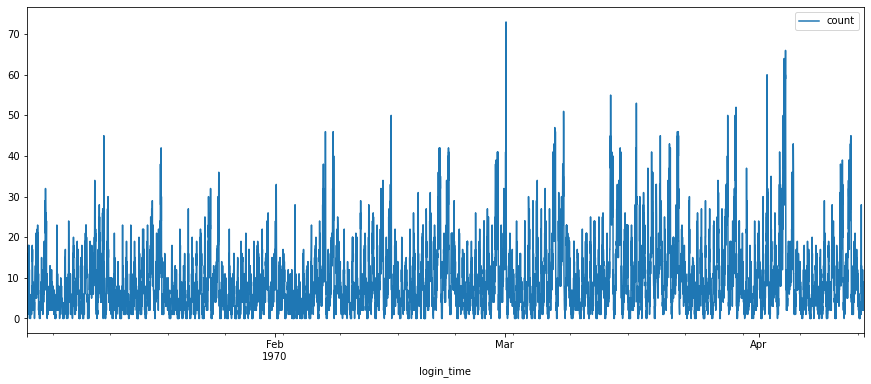

In [7]:
# Aggregate user logins based on 15 minute intervals
user_logins = df.resample('15min').sum()

# Plot aggregations
user_logins.plot(figsize=(15,6));

#### Prima facie, it appears that there are four upward trends every month. Let's get further statistics on the time series.

In [8]:
user_logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


#### The median user logins per 15 minutes is 7, with 73 logins being the max observed. To get more information, it is profitable to see the time series of user login both by day and month.

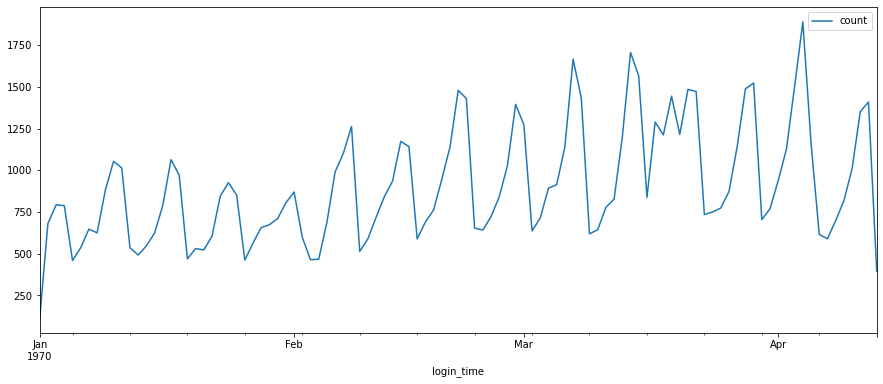

In [9]:
# Day-to-Day user logins
daily_user_logins = user_logins.resample('1D').sum()

daily_user_logins.plot(figsize=(15, 6));

In [10]:
daily_user_logins.describe()

,count
count,103.000000
mean,904.291262
std,347.167463
min,112.000000
25%,643.000000
50%,827.000000
75%,1141.000000
max,1889.000000


Note also the lessened granularity of our time series given that we're working on a higher, less detailed, level. The median user login per day is 827, with a maximum of 1,889. It appears that user logins increase throughout the months of January and April. 

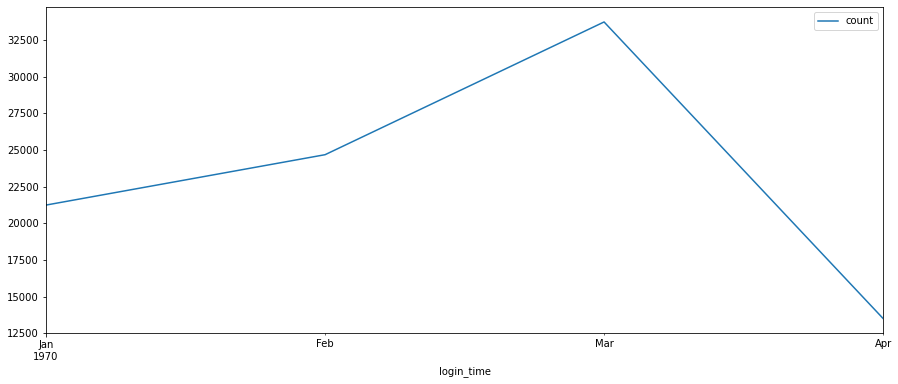

In [11]:
# Aggregate user logins based on 15 minute intervals
monthly_user_logins = user_logins.resample('1M').sum()

# Plot aggregations
monthly_user_logins.plot(figsize=(15,6));

In [12]:
monthly_user_logins.describe()

,count
count,4.000000
mean,23285.500000
std,8380.011675
min,13507.000000
25%,19306.000000
50%,22956.000000
75%,26935.500000
max,33723.000000


#### To further on the previous comment made, user logins are, indeed, increasing. However, they start to decline by the beginning of April. See report for more details on the analysis. 

# Part 2: Experiment and Metrics Design

## Introduction

The Ultimate managers of city operations have proposed "an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs." Rendered slightly differently: the Ultimate managers want to encourage inclusivity between cities and lessen the hypothesized exclusivity. To put this hypothesis of exclusivity to the test, here's my proposed solution. 

## 2A

To assess the purported level of exclusivity engendered by driving partners, take the total amount of driver partners that traveled to both cities, Gotham and Metropolis, during the day or (i.e., the "or" being used here is the so-called "exclusive-or") at night on the weekdays, over the total amount of driver partners that traveled to both cities on the weekday at any time. After we've calculated this percentage, this will stand for our present level of inclusivity. (A note on this metric. I chose this metric because it takes into account a few exclusivity-favoring conditions --namely, day or night, and weekdays. On the weekdays, a driving partner would have a little-to-no incentive to travel to both cities during the day or the night on the weekday, exclusively. If they did so, it might be suggested that the reimbursement of the toll fare had something to do with it.) 

## 2B

2b. To implement this experiment we need to establish a few more things. After the experiment, or whenever we see fit to check again, we will once again calculate the above metric, checking to see the percentage change. Since the metric stands for the level of inclusivity engendered by the driver partners, it stands to reason that if our percent change is both positive and significant (which I will define shortly), it is to note that the level of inclusivity among driver partners has increased, or in other words, the experiment was a success given that the objective, as rendered earlier, was to lessen exclusivity and encourage inclusivity. However, to fully implement this experiment, we will need to collect data. In specific, we will need to collect the following: the associated driver partner association (in the form of a code or ID), their origin, their destination, and the time of the toll transaction(s). If these data can be collected, the analysis can be done. One last point that needs to be mentioned: What will constitute a significant percentage increase? Well, that is partly dependent on the present level of inclusivity (i.e., the metric percentage). But for both clarity and simplicity's sake, let's say anything over 10% would be viewed as a significant percent change.

## 2C

If the percent change increases by what is deemed a significant amount, then there is reason to believe that the experiment has been a success. However, it cannot be certain whether these changes are sustainable, given the extra expenditures of reimbursing toll fares. Perhaps the inclusivity engendered by the driving partners will more than make up for the expenditures but that will depend on the level of the percent change and, more fundamentally, if the metric chosen measures what it purportedly does. 

# Part 3: Predictive Modeling

## 3.1 Data Wrangling

In [13]:
# Sourcing data
df1 = pd.read_json('ultimate_data_challenge.json')

df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
# Checking for null values
df1.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [16]:
# Checking for duplicates in dataframe.
df1.duplicated().sum()

8

In [17]:
# Dropping duplicates.
df1 = df1.drop_duplicates()

# Verifying
df1.duplicated().sum()

0

In [18]:
# Given that I'll be using certain columns as predictor variables,
# I need to start to investigate the columns with missing values to see
# how to go about imputing for them.
# First, I'll get some statistics on the 'avg_rating_of_driver' column.
df1['avg_rating_of_driver'].describe()

count    41873.000000
mean         4.601512
std          0.617360
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

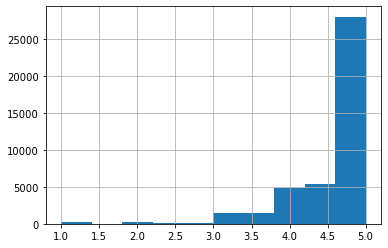

In [19]:
# Seeing the distribution of the "avg_rating_of_driver" column.
df1['avg_rating_of_driver'].hist();

In [20]:
# Imputing median for null values.
df1['avg_rating_of_driver'] = df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].median())

In [21]:
# Verifying
df1['avg_rating_of_driver'].isna().sum()

0

In [22]:
# Given that the "phone" column is categorical, 
# getting, for instance, the mode could be useful for imputation.
df1['phone'].describe()

count      49596
unique         2
top       iPhone
freq       34578
Name: phone, dtype: object

In [23]:
# In this case, I see little-to-no reason to do imputation with this column.
# Therefore, I'll drop null values. 
df1 = df1[df1['phone'].notna()]

# Verifying
df1['phone'].isna().sum()

0

In [24]:
# Getting statistics on "avg_rating_by_driver" column.
df1['avg_rating_by_driver'].describe()

count    49398.000000
mean         4.777825
std          0.447141
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

<AxesSubplot:>

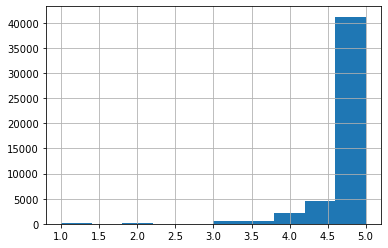

In [25]:
# Seeing distribution of column.
df1['avg_rating_by_driver'].hist()

In [26]:
# Imputing median for null values.
df1['avg_rating_by_driver'] = df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].median())

# Verifying
df1['avg_rating_by_driver'].isna().sum()

0

There are two problematic columns that need to be adjusted --namely, "signup_date" and "last_trip_date" columns. Their data types are (string) objects when they should be datetime objects, especially "last_trip_date", given that with that column (and some feature engineering) we'll derive our response variable. Let's do some data type converting. 

In [27]:
# Converting "signup_date" and "last_trip_date" columns to 
# datetime objects
df1[['signup_date', 'last_trip_date']] = df1[['signup_date', 'last_trip_date']].apply(pd.to_datetime)


# Verifying
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49596 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49596 non-null  object        
 1   trips_in_first_30_days  49596 non-null  int64         
 2   signup_date             49596 non-null  datetime64[ns]
 3   avg_rating_of_driver    49596 non-null  float64       
 4   avg_surge               49596 non-null  float64       
 5   last_trip_date          49596 non-null  datetime64[ns]
 6   phone                   49596 non-null  object        
 7   surge_pct               49596 non-null  float64       
 8   ultimate_black_user     49596 non-null  bool          
 9   weekday_pct             49596 non-null  float64       
 10  avg_dist                49596 non-null  float64       
 11  avg_rating_by_driver    49596 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

Great, it seems that the data is mostly cleaned. Let's move onto some EDA.

## 3.2 EDA

C:\Users\16466\AppData\Local\Temp\ipykernel_14508\1216017098.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), annot=True)


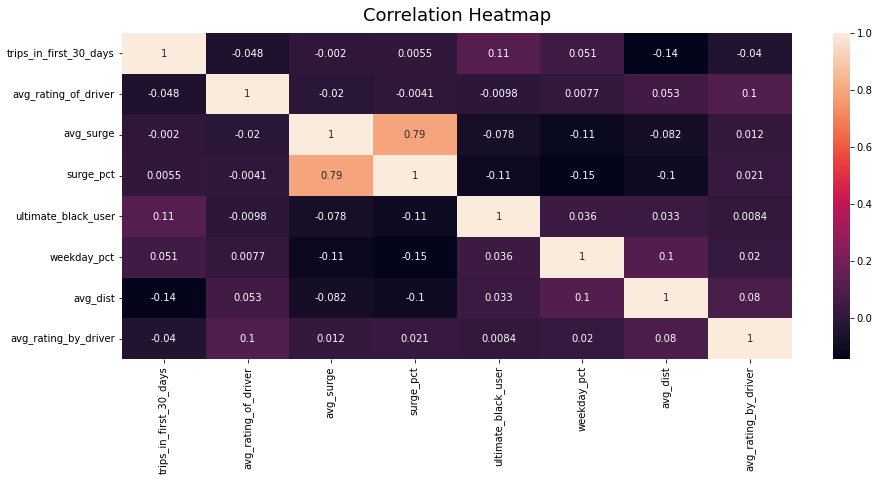

In [28]:
# I want to see the correlations (if any) held by certain columns. 
# I'll start by creating a heatmap of the correlations among the variables.
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df1.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [29]:
# Getting list of categorical columns.
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()

# Getting the city and type of phone that are represented the most in the dataframe. 
for column in cat_columns:
    print(df1[column].value_counts())

Winterfell        23120
Astapor           16410
King's Landing    10066
Name: city, dtype: int64
iPhone     34578
Android    15018
Name: phone, dtype: int64


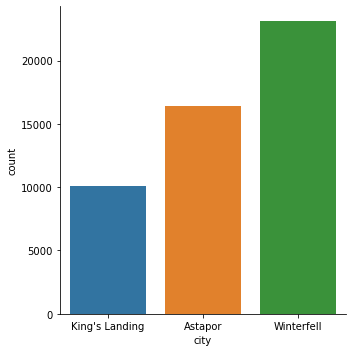

In [30]:
# To make the matter more clearer, here's a visual representation
# of the most populous cities.
sns.catplot(kind='count', x='city', data=df1)
plt.show()

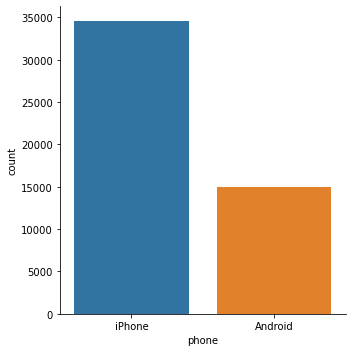

In [31]:
# Here's a visual representation of the phones and their
# their respective distribution in the dataframe.
sns.catplot(kind='count', x='phone', data=df1)
plt.show()

## 3.3 Preprocessing

### 3.3.1 Feature Engineering

Given that it is with the column "last_trip_date" that we'll derive our response variable, it's time to modify it into a form that a classification model can work with it. 

In [32]:
# Using the describe method, I can attain the latest date
# recorded in the column. It appears that July 7, 2014
# was the last date recorded. With this date in possession, we can
# work out the rest.
df1['last_trip_date'].describe()

C:\Users\16466\AppData\Local\Temp\ipykernel_14508\302146133.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['last_trip_date'].describe()


count                   49596
unique                    182
top       2014-06-29 00:00:00
freq                     2019
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [33]:
# Import necessary modules
from datetime import datetime, timedelta

# Sort dataframe by the column "last_trip_date"
df1 = df1.sort_values(by='last_trip_date', ascending=True)

In [34]:
# Get the lastest date recorded in the dataframe
today = df1['last_trip_date'].iloc[-1]

# Get the date that was 30 days before latest date
thirty_days_ago = today - timedelta(days=30)

# Verifying results are correct
print(today)
print(thirty_days_ago)

2014-07-01 00:00:00
2014-06-01 00:00:00


In [35]:
# Creating a new binary column that is based on the "last_trip_date column".
df1['Retention'] = np.where(df1['last_trip_date'] >= thirty_days_ago, 1, 0)

# Verifying
df1.tail(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retention
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7,1
26467,King's Landing,9,2014-01-16,4.8,1.14,2014-07-01,iPhone,17.6,True,62.7,7.33,4.9,1
26478,Astapor,4,2014-01-11,4.8,1.00,2014-07-01,Android,0.0,False,100.0,2.54,4.3,1
9491,Astapor,0,2014-01-19,4.7,1.38,2014-07-01,iPhone,50.0,False,50.0,5.00,5.0,1
5562,King's Landing,0,2014-01-28,5.0,1.04,2014-07-01,iPhone,14.3,True,42.9,2.11,5.0,1
43090,King's Landing,2,2014-01-19,4.3,1.06,2014-07-01,iPhone,6.3,True,56.3,5.60,4.9,1
38112,Winterfell,7,2014-01-11,4.6,1.00,2014-07-01,iPhone,0.0,False,58.8,2.33,4.8,1
40692,Winterfell,4,2014-01-07,4.6,1.06,2014-07-01,iPhone,13.6,True,81.8,4.81,4.4,1
21263,Winterfell,3,2014-01-23,4.4,1.04,2014-07-01,iPhone,14.3,False,71.4,2.27,5.0,1
12139,King's Landing,16,2014-01-18,4.9,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8,1


In [36]:
# Getting rid of unnecessary columns
df1.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

### 3.3.2 Getting Dummy Variables

In [37]:
# Binarize "ultimate_black_user" column
df1['ultimate_black_user'] = np.where(df1['ultimate_black_user'] == 'True', 1, 0)

In [38]:
# Getting dummy variables for categorical columns
df1 = pd.get_dummies(df1, columns=['city', 'phone'])

# Verifying
df1.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retention,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
20058,1,4.9,1.0,0.0,0,100.0,10.80,5.0,0,1,0,0,0,1
44807,1,4.9,1.0,0.0,0,100.0,2.69,5.0,0,0,1,0,0,1
38172,1,4.9,1.0,0.0,0,100.0,1.38,5.0,0,0,0,1,0,1
3365,1,4.0,1.0,0.0,0,100.0,3.74,5.0,0,0,0,1,0,1
49545,1,5.0,1.0,0.0,0,100.0,1.23,5.0,0,0,1,0,0,1


### 3.3.3 Splitting Data into Training and Test Dataset

In [39]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Getting predictor variables and response variable
X = df1.drop('Retention', axis=1)
y = df1['Retention'] # Getting reponse variable

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
# Verifying
X.shape, y.shape

((49596, 13), (49596,))

### 3.3.4 Normalization

In [41]:
# Normalizing
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)  
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

## 3.4 Modeling

### 3.4.1 Logistic Regression

In [42]:
# Importing essential modules.
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn                 import preprocessing
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from pprint                  import pprint

In [43]:
# Instantiate, fit, and predict with logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Checking performance of default logistic regression model.
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6888231736003764
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      9286
           1       0.65      0.36      0.47      5593

    accuracy                           0.69     14879
   macro avg       0.68      0.62      0.62     14879
weighted avg       0.68      0.69      0.66     14879

[[8209 1077]
 [3553 2040]]


Feature: 0, Score: 4.11707931027866
Feature: 1, Score: 1.9783079688713998
Feature: 2, Score: 0.6653950754199782
Feature: 3, Score: 2.6969701752133544
Feature: 4, Score: 0.0
Feature: 5, Score: 4.052312103382424
Feature: 6, Score: 1.743681044212678
Feature: 7, Score: 1.3286567037577097
Feature: 8, Score: -7.747286951137627
Feature: 9, Score: 11.21388329959989
Feature: 10, Score: -2.67682639398469
Feature: 11, Score: -6.170679889010811
Feature: 12, Score: 6.96044984348842


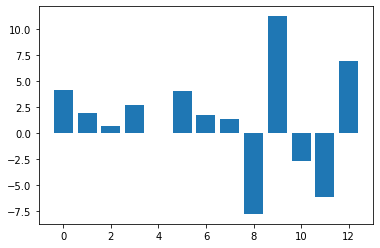

In [44]:
# Getting features by importance
importance = model.coef_[0]

# Summarizing feature importance
for i, v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i, v))
    
# Plotting feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

It appears that the two features that predict user retention the highest in this model are features 9 and 12. Theses features correspond to "city_Astapor" and "phone_Android", respectively. Let's do another model to see if any patterns arise. 

Let's do some hyperparameter optimization to see if the features that are most important change.

### 3.4.2 Hyperparameter optimization

In [45]:
# Import module
from sklearn.model_selection import RepeatedStratifiedKFold

# Setting hyperparameters for grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defining grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Summarizing results
print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{} ({}) with {}'.format(mean, stdev, param))

C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best: 0.6907376530179176 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.0 (0.0) with {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.0 (0.0) with {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.6907376530179176 (0.005762829056826131) with {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.6905551915564601 (0.005543987610638732) with {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6906416136821174 (0.005513379331281541) with {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690632013067678 (0.005517580629116266) with {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.0 (0.0) with {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.0 (0.0) with {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.6906416081502164 (0.005496612940913849) with {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.6895182366865948 (0.005483827921656338) with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.689470228082497 (0.005497802326910139) with {'C': 10, 'penalty': 'l2', 'solver': 

0.6960145171046441
Feature: 0, Score: 4.400745287490898
Feature: 1, Score: 1.6249120435957787
Feature: 2, Score: -5.761465167003038
Feature: 3, Score: 2.8438521794676443
Feature: 4, Score: 0.0
Feature: 5, Score: 4.19811199297444
Feature: 6, Score: 1.8962559567882942
Feature: 7, Score: 0.703161558800845
Feature: 8, Score: -3.6081811280377307
Feature: 9, Score: 24.02549986914323
Feature: 10, Score: 4.283465854215903
Feature: 11, Score: -7.4071938743022985
Feature: 12, Score: 11.360683998984209


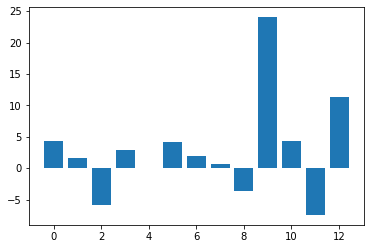

In [46]:
# Verifying optimized model
model = LogisticRegression(penalty='l1', solver='liblinear', C=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Checking most important features again
importance = model.coef_[0]

# Summarizing feature importance
for i, v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i, v))
    
# Plotting feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

It appears that the two same features still hold, which is good news.

### 3.4.3 Decision Tree Classifier

In [47]:
# Import model 
from sklearn.tree import DecisionTreeClassifier

# Instantiate, fit, and predict with DecisionTreeClassifier model
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Checking performance of DecisionTreeClassifier model
print(accuracy_score(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

0.70952348948182
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      9286
           1       0.62      0.60      0.61      5593

    accuracy                           0.71     14879
   macro avg       0.69      0.69      0.69     14879
weighted avg       0.71      0.71      0.71     14879

[[7223 2063]
 [2259 3334]]


Feature: 0, Score: 0.08796854232928004
Feature: 1, Score: 0.12525743753348936
Feature: 2, Score: 0.06669450113511496
Feature: 3, Score: 0.07691524267071731
Feature: 4, Score: 0.0
Feature: 5, Score: 0.13400855840330808
Feature: 6, Score: 0.1133834123178804
Feature: 7, Score: 0.10501727165496447
Feature: 8, Score: 0.024897691943444707
Feature: 9, Score: 0.06427140935012884
Feature: 10, Score: 0.03417498361883989
Feature: 11, Score: 0.015076896218961243
Feature: 12, Score: 0.1523340528238708


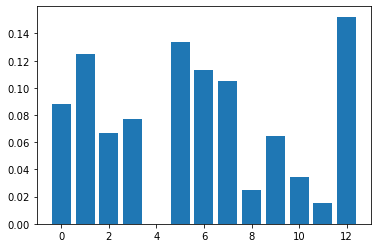

In [48]:
# Getting features by importance
importance = model_2.feature_importances_

# Summarizing feature importance
for i, v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i, v))
    
# Plotting feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

There seems to be a feature that has been consistently important in the last two models --namely, the user's phone being an Android. However, there are a few new features that ought to be mentioned: features 5 and 1. These features correspond with variables "avg_rating_of_driver" and "weekday_pct", respectively. Let's see if these new features remain important when we optimize our model.

### 3.4.4 Hyperparameter Optimization

In [49]:
# Setting hyperparameters for grid search
grid = {'criterion':['gini','entropy', 'log_less'],
             'max_depth': range(2, 10),
             'splitter' : ['best', 'random']}

# Defining grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# Summarizing results
print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{} ({}) with {}'.format(mean, stdev, param))

C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_less'

  warnings.warn(some_fits_faile

Best: 0.760808839734628 using {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
0.7255810708964023 (0.007203265701850374) with {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.6536268914123208 (0.02779941079579662) with {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
0.726858066020806 (0.007325717175070665) with {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
0.6977556385562005 (0.017797366933621703) with {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
0.7413657118826563 (0.0069848111696378) with {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.7047749268572032 (0.018864728886971202) with {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
0.7528778636992665 (0.007005962479507984) with {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
0.7209245018301742 (0.013712138045607348) with {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
0.758734869143985 (0.00632161064768376) with {'criterion': 'gini', '

0.7661133140668056
Feature: 0, Score: 0.07815369548723547
Feature: 1, Score: 0.0074079469252062895
Feature: 2, Score: 0.011015615025837781
Feature: 3, Score: 0.1520167407980679
Feature: 4, Score: 0.0
Feature: 5, Score: 0.19707209441576445
Feature: 6, Score: 0.015551356598548583
Feature: 7, Score: 0.017630284120148446
Feature: 8, Score: 0.02108418792018995
Feature: 9, Score: 0.16964755789423883
Feature: 10, Score: 0.01497333134546478
Feature: 11, Score: 0.0034215104448081395
Feature: 12, Score: 0.31202567902448947


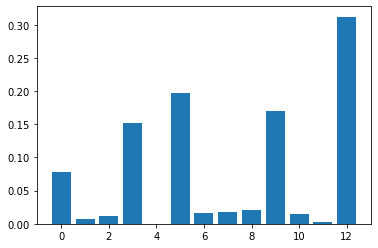

In [50]:
# Verifying optimized model
model_2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
print(accuracy_score(y_test, y_pred_2))

# Checking most important features again
importance = model_2.feature_importances_

# Summarizing feature importance
for i, v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i, v))
    
# Plotting feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### 3.4.5 Random Forest

In [51]:
# Import model
from sklearn.ensemble import RandomForestClassifier

# Instantiate, fit, and predict with RandomForest model
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Checking performance of RandomForest model
print(accuracy_score(y_test, y_pred_3))
print(classification_report(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))

0.7617447409100074
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      9286
           1       0.70      0.65      0.67      5593

    accuracy                           0.76     14879
   macro avg       0.75      0.74      0.74     14879
weighted avg       0.76      0.76      0.76     14879

[[7693 1593]
 [1952 3641]]


Feature: 0, Score: 0.08146684107691858
Feature: 1, Score: 0.11243275793215622
Feature: 2, Score: 0.1054810784533585
Feature: 3, Score: 0.07387708365551694
Feature: 4, Score: 0.0
Feature: 5, Score: 0.10290602699398012
Feature: 6, Score: 0.09845911844033271
Feature: 7, Score: 0.11824742125821601
Feature: 8, Score: 0.041367268911549
Feature: 9, Score: 0.06723056888618019
Feature: 10, Score: 0.05158769631457567
Feature: 11, Score: 0.03703423449998466
Feature: 12, Score: 0.10990990357723142


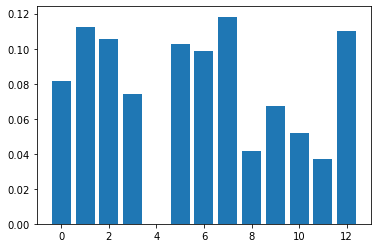

In [52]:
# Getting features by importance
importance = model_3.feature_importances_

# Summarizing feature importances
for i, v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i, v))

# Plotting feature importances
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Again features 1 and 12 are important. Let's see if these features remain important when we do model optimization.

### 3.4.5 Model Optimization

In [53]:
# Setting hyperparameters for grid search
n_estimators = range(10, 100)

# Defining grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model_3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Summarizing results
print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{} ({}) with: {}'.format(mean, stdev, param))

Best: 0.7514477068278264 using {'n_estimators': 78}
0.739628363008664 (0.008719249753598494) with: {'n_estimators': 10}
0.7397434486801105 (0.007134255488448005) with: {'n_estimators': 11}
0.7406363362484242 (0.007172222508636034) with: {'n_estimators': 12}
0.7411069046534795 (0.006513676334948817) with: {'n_estimators': 13}
0.7437569287061855 (0.007087139080427025) with: {'n_estimators': 14}
0.7418941716332074 (0.006631846622805504) with: {'n_estimators': 15}
0.7441025784855069 (0.006786369652095244) with: {'n_estimators': 16}
0.7433631818123481 (0.006859282087649389) with: {'n_estimators': 17}
0.7447937674061269 (0.006185174059916408) with: {'n_estimators': 18}
0.7441407845607735 (0.0074831558416182395) with: {'n_estimators': 19}
0.7451491229060095 (0.008266253729682437) with: {'n_estimators': 20}
0.745754039062303 (0.006622451689054923) with: {'n_estimators': 21}
0.746608485449551 (0.006247122387385497) with: {'n_estimators': 22}
0.7464357297086546 (0.006866896933736963) with: {'n_e

In this case, the model's performance did not improve. Let's base the results soley on the base model of previous.

## Findings

### 3.1

The data wrangling part was fairly simple. There were three columns with null values; two of the three columns were dealt with by imputing the median value of the column for all null values. Also, there were two columns, one that is imperative in the contructing of the response variable, that were object data types when in fact they needed to be datetime objects. The conversion was fairly easily done. Moving onto the EDA part. This part was fairly short for the following two reasons: (1) the objective of the analysis was clear by the end of the data wrangling part and I didn't forsee the EDA part having much or any influence on the attaining of the objective; and (2) the dataset had been already considerably explored by the end of the data wrangling part. The next two parts, preprocessing and modeling, were by far the most demanding in terms of both time and work. For preprocessing, I had to create the response variable. Afterward, I needed to binarize it, given that the nature of the problem is classificatory. Next, I did one-hot encoding on a couple of variables that were nominal. Lastly, I normalized the predictive variables so that the classification models would not be affected disportionately by certain variables' differing values. In the modeling part, I tried several different classification models with the aim of finding what features were the most important at predicting the response variable. I checked feature importance on each model before and after optimization. The results of the features that hold the greatest predictive power are expounded on below.

Q: What fraction of the observed users were retained?

In [56]:
df1['Retention'].value_counts()

0    30925
1    18671
Name: Retention, dtype: int64

In [67]:
perc = 18671/(18671 + 30925)
print('A: The fraction of observed users that were retained is {}%'.format(round(perc, 2)))

A: The fraction of observed users that were retained is 0.38%


### 3.2 and 3.3

I built several classification models, and there were four features that came out to be consistently important in predicting user retention. These features were 1, 5, 9, and 12. These features stand for the following properties, respectively: the average rating of a driver, the percentage of users' trips occurring in the weekends, the city of Astapor being the one the user signed up in, and the user's primary device being an Android phone.

Noted by the performances of the classification models, a user will more likely be active in the system if they happen to reside or live in Astapor and use an Android phone as their primary device. These properties can be leveraged by Ultimate to increase the likelihood of user retention. Furthermore, but more difficult to implement, the drivers, or the prospect drivers, of the company can be screened and trained for ensuring a better quality experience (whatever constitutes that can be made clearer with a qualitative survey) can improve the likelihood of user retention. Lastly, the company can seek to further improve relations with their users that predominately use their service(s) on the weekends.

If the information above is leveraged by Ultimate, (assuming many things, among them that the features do, indeed, wield predictive power in user retention), user retention should improve. So, the validity of my model rests on many assumptions, but these assumptions are bolstered on the results of several classification models and feature importance consistency. As to my concerns, I believe I have made them clear: the model relies on many assumptions, the most important of which is that the features mentioned wield predictive power in user retention.